In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('./BigML_Dataset_5f50a62795a9306aa200003e.csv')
df

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN,NaN,NaN,Yes,Yes
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,Yes
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 3: Tình trạng hôn nhân và việc đọc sách điện tử/ sách in/ sách nói trong năm có mối quan hệ như thế nào?"   </b></font>
</div>


In [13]:
# Chuẩn hóa cột 'Marital status?' thành các nhóm
def map_marital_status(status):
    if status in ['Married', 'Living with a partner']:
        return 'Married or Living with a partner'
    elif status in ['Single', 'Never been married']:
        return 'Single'
    elif status == 'Divorced':
        return 'Divorced'
    elif status == 'Widowed':
        return 'Widowed'
    elif status == 'Separated':
        return 'Separated'
    else:
        return 'Unknown'

df['Marital Status Grouped'] = df['Marital status?'].apply(map_marital_status)
print(df[['Marital status?', 'Marital Status Grouped']].head())

      Marital status?            Marital Status Grouped
0            Divorced                          Divorced
1             Married  Married or Living with a partner
2  Never been married                            Single
3             Married  Married or Living with a partner
4  Never been married                            Single


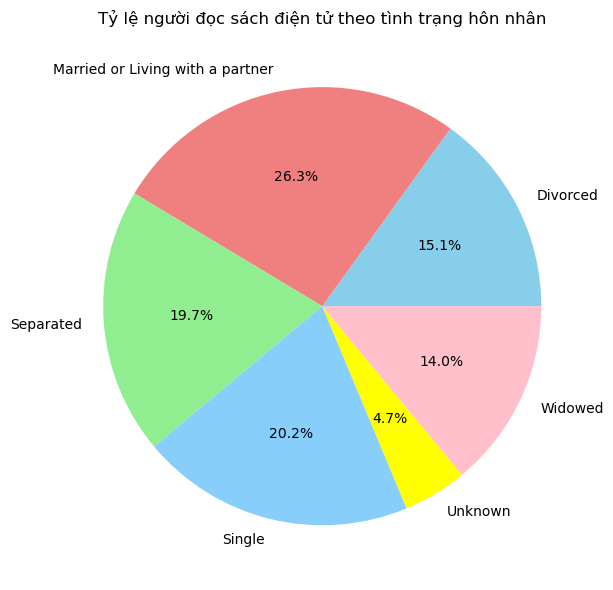

In [14]:
# Chuyển đổi cột 'Read any e-books during last 12months?' từ Yes/No thành 1/0
df['Read any e-books during last 12months?'] = df['Read any e-books during last 12months?'].map({'Yes': 1, 'No': 0})
# Tính tỷ lệ trung bình người đọc sách điện tử cho mỗi nhóm tình trạng hôn nhân
marital_e_books = df.groupby('Marital Status Grouped')['Read any e-books during last 12months?'].mean() # Sử dụng 'Marital Status Grouped' đã chuẩn hoá ở câu 1

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,6))
marital_e_books.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightskyblue', 'yellow', 'pink'])
plt.title('Tỷ lệ người đọc sách điện tử theo tình trạng hôn nhân')
plt.ylabel('')  
plt.tight_layout()
plt.show()

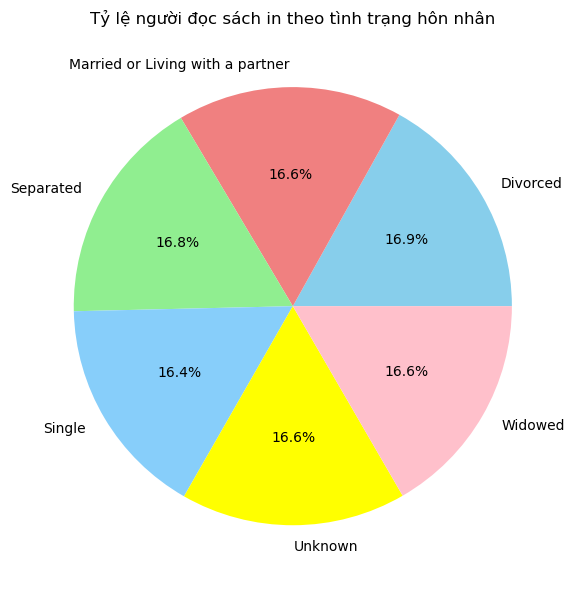

In [15]:
# Chuyển đổi cột 'Read any printed books during last 12months?' từ Yes/No thành 1/0
df['Read any printed books during last 12months?'] = df['Read any printed books during last 12months?'].map({'Yes': 1, 'No': 0})
# Tính tỷ lệ trung bình người đọc sách in cho mỗi nhóm tình trạng hôn nhân
marital_e_books = df.groupby('Marital Status Grouped')['Read any printed books during last 12months?'].mean() 

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,6))
marital_e_books.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightskyblue', 'yellow', 'pink'])
plt.title('Tỷ lệ người đọc sách in theo tình trạng hôn nhân')
plt.ylabel('')  
plt.tight_layout()
plt.show()

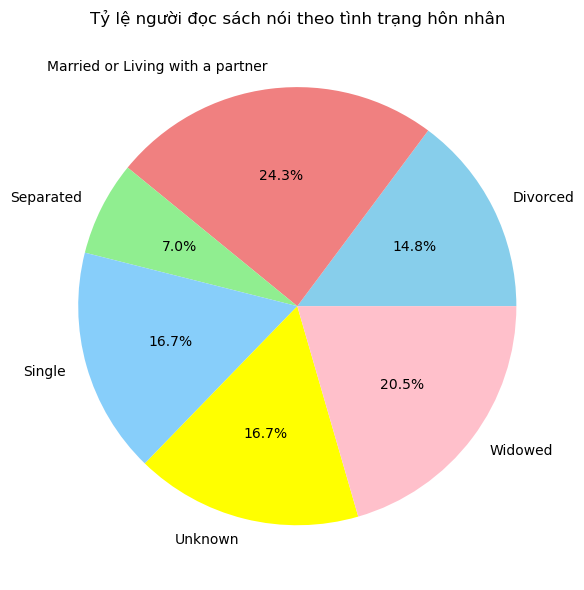

In [16]:
# Chuyển đổi cột 'Read any audiobooks during last 12months?' từ Yes/No thành 1/0
df['Read any audiobooks during last 12months?'] = df['Read any audiobooks during last 12months?'].map({'Yes': 1, 'No': 0})
# Tính tỷ lệ trung bình người đọc sách nói cho mỗi nhóm tình trạng hôn nhân
marital_e_books = df.groupby('Marital Status Grouped')['Read any audiobooks during last 12months?'].mean() 

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,6))
marital_e_books.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightskyblue', 'yellow', 'pink'])
plt.title('Tỷ lệ người đọc sách nói theo tình trạng hôn nhân')
plt.ylabel('')  
plt.tight_layout()
plt.show()